In [2]:
import scipy.io as sci
import numpy as np
import glob
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import pylab
import hddm
from functions import *

C:\Users\Edwin\miniconda3\envs\hddm\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


# Data Format

In [3]:
datapath = 'ExpData/*.mat'
datafiles = np.array(glob.glob(datapath))

In [4]:
flashdata = np.empty((1,5))
beepdata = np.empty((1,5))
for i in np.arange(0, len(datafiles)):
    mat = sci.loadmat(datafiles[i])
    matf = np.insert(mat['mixtrF'], 0, int(i + 1), axis=1)
    accf = np.hstack((matf, mat['accMatF'], mat['resptimeF']))
    matb = np.insert(mat['mixtrB'], 0, int(i + 1), axis=1)
    accb = np.hstack((matb, mat['accMatB'], mat['resptimeB']))
    flashdata = np.vstack((flashdata, accf))
    beepdata = np.vstack((beepdata, accb))
    
flashdata = flashdata[1:]
beepdata = beepdata[1:]

In [5]:
flashframe = pd.DataFrame(flashdata, columns=['subj_idx', 'flashpres', 'beeppres', 'acc', 'rt'])
beepframe = pd.DataFrame(beepdata, columns=['subj_idx', 'flashpres', 'beeppres', 'acc', 'rt'])

congrf = flashframe.loc[flashframe['flashpres'] == flashframe['beeppres']]
unif = flashframe.loc[flashframe['beeppres'] == 0]
congrb = beepframe.loc[beepframe['flashpres'] == beepframe['beeppres']]
unib = beepframe.loc[beepframe['flashpres'] == 0]

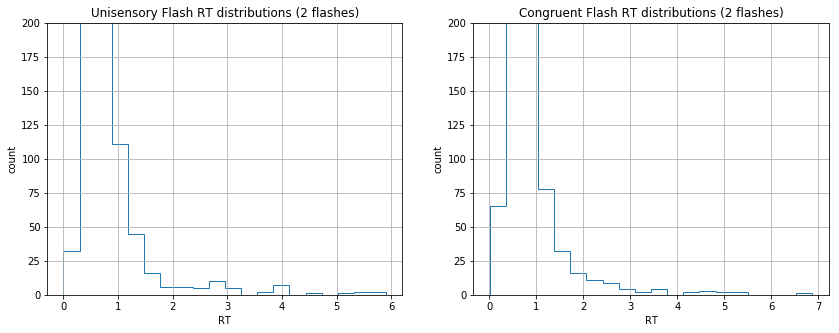

In [6]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(121, xlabel='RT', ylabel='count', title='Unisensory Flash RT distributions (2 flashes)')
#for i, subj_data in unif.loc[unif['flashpres'] == 2].groupby('subj_idx'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
unif.loc[unif['flashpres'] == 2].rt.hist(bins=20, histtype='step', ax=ax)
ax.set_ylim([0, 200])
    
ax = fig.add_subplot(122, xlabel='RT', ylabel='count', title='Congruent Flash RT distributions (2 flashes)')
#for i, subj_data in congrf.loc[congrf['flashpres'] == 2].groupby('subj_idx'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
unif.loc[unif['flashpres'] == 3].rt.hist(bins=20, histtype='step', ax=ax)
ax.set_ylim([0, 200])
plt.show()

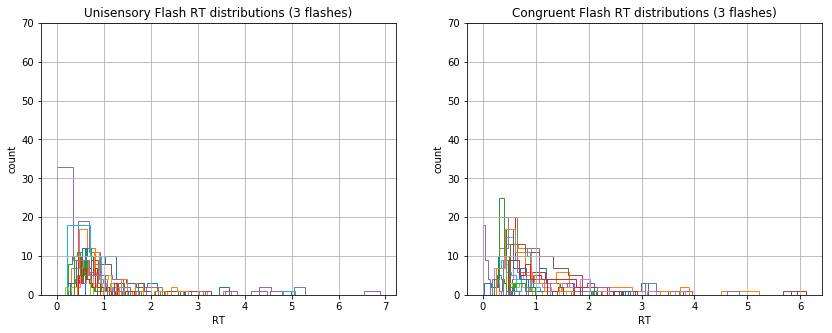

In [6]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(121, xlabel='RT', ylabel='count', title='Unisensory Flash RT distributions (3 flashes)')
for i, subj_data in unif.loc[unif['flashpres'] == 3].groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
ax.set_ylim([0, 70])
    
ax = fig.add_subplot(122, xlabel='RT', ylabel='count', title='Congruent Flash RT distributions (3 flashes)')
for i, subj_data in congrf.loc[congrf['flashpres'] == 3].groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
ax.set_ylim([0, 70])
plt.show()

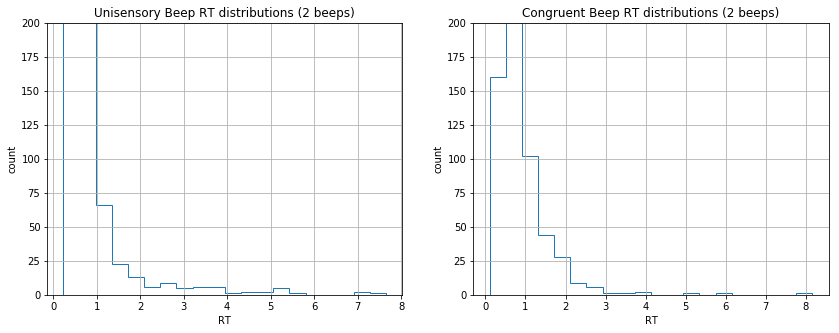

In [18]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(121, xlabel='RT', ylabel='count', title='Unisensory Beep RT distributions (2 beeps)')
#for i, subj_data in unif.loc[unif['flashpres'] == 2].groupby('subj_idx'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
unib.loc[unib['beeppres'] == 2].rt.hist(bins=20, histtype='step', ax=ax)
ax.set_ylim([0, 200])
    
ax = fig.add_subplot(122, xlabel='RT', ylabel='count', title='Congruent Beep RT distributions (2 beeps)')
#for i, subj_data in congrf.loc[congrf['flashpres'] == 2].groupby('subj_idx'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
unib.loc[unib['beeppres'] == 3].rt.hist(bins=20, histtype='step', ax=ax)
ax.set_ylim([0, 200])
plt.show()

In [7]:
uniflashacc = sum(unif.loc[unif['flashpres'] == 2]['acc']) / len(unif.loc[unif['flashpres'] == 2])

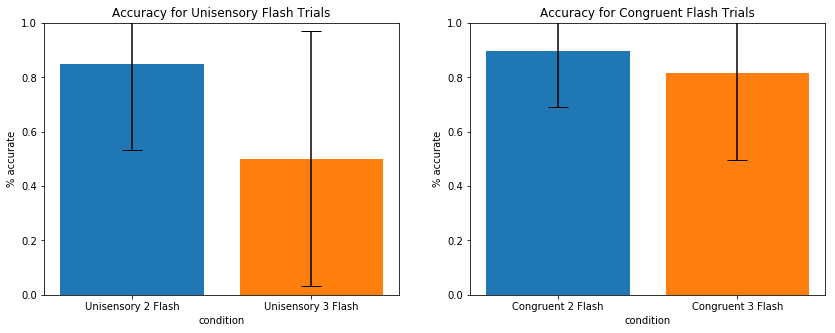

In [8]:
uni2flashacc = sum(unif.loc[unif['flashpres'] == 2]['acc']) / len(unif.loc[unif['flashpres'] == 2])
uni3flashacc = sum(unif.loc[unif['flashpres'] == 3]['acc']) / len(unif.loc[unif['flashpres'] == 3])
congr2flashacc = sum(congrf.loc[congrf['flashpres'] == 2]['acc']) / len(congrf.loc[congrf['flashpres'] == 2])
congr3flashacc = sum(congrf.loc[congrf['flashpres'] == 3]['acc']) / len(congrf.loc[congrf['flashpres'] == 3])

fig = plt.figure(figsize = (14, 5))
ax = fig.add_subplot(121, xlabel='condition', ylabel='% accurate', title='Accuracy for Unisensory Flash Trials')
objects = ('Unisensory 2 Flash',  'Unisensory 3 Flash')
y_pos = np.arange(len(objects))
performance = [uni2flashacc, uni3flashacc]

uni2flashaccstd = calcstderr(unif.loc[unif['flashpres'] == 2], 'acc')
uni3flashaccstd = calcstderr(unif.loc[unif['flashpres'] == 3], 'acc')
congr2flashaccstd = calcstderr(congrf.loc[congrf['flashpres'] == 2], 'acc')
congr3flashaccstd = calcstderr(congrf.loc[congrf['flashpres'] == 3], 'acc')

plt.bar(y_pos, performance, yerr=[uni2flashaccstd, uni3flashaccstd], 
        color=['#1f77b4', '#ff7f0e'], ecolor='black', capsize=10)

plt.xticks(y_pos, objects)
plt.ylim([0,1])

ax = fig.add_subplot(122, xlabel='condition', ylabel='% accurate', title='Accuracy for Congruent Flash Trials')
objects2 = ('Congruent 2 Flash', 'Congruent 3 Flash')
y_pos2 = np.arange(len(objects2))
performance2 = [congr2flashacc, congr3flashacc]
plt.bar(y_pos2, performance2, yerr=[congr2flashaccstd, congr3flashaccstd], 
        color=['#1f77b4', '#ff7f0e'], ecolor='black', capsize=10)
plt.xticks(y_pos2, objects2)
plt.ylim([0,1])

plt.show()

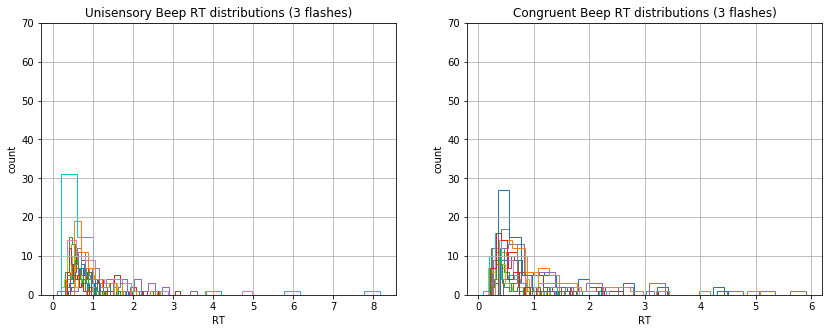

In [20]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(121, xlabel='RT', ylabel='count', title='Unisensory Beep RT distributions (3 flashes)')
for i, subj_data in unib.loc[unib['beeppres'] == 3].groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
ax.set_ylim([0, 70])
    
ax = fig.add_subplot(122, xlabel='RT', ylabel='count', title='Congruent Beep RT distributions (3 flashes)')
for i, subj_data in congrb.loc[congrb['beeppres'] == 3].groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
ax.set_ylim([0, 70])
plt.show()

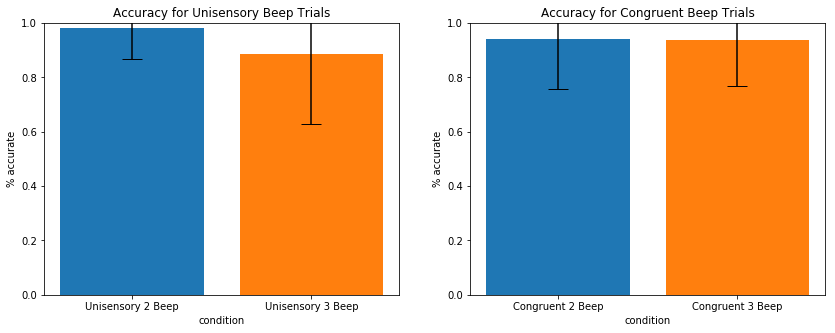

In [17]:
uni2beepacc = sum(unib.loc[unib['beeppres'] == 2]['acc']) / len(unib.loc[unib['beeppres'] == 2])
uni3beepacc = sum(unib.loc[unib['beeppres'] == 3]['acc']) / len(unib.loc[unib['beeppres'] == 3])
congr2beepacc = sum(congrb.loc[congrb['beeppres'] == 2]['acc']) / len(congrb.loc[congrb['beeppres'] == 2])
congr3beepacc = sum(congrb.loc[congrb['beeppres'] == 3]['acc']) / len(congrb.loc[congrb['beeppres'] == 3])

fig = plt.figure(figsize = (14, 5))
ax = fig.add_subplot(121, xlabel='condition', ylabel='% accurate', title='Accuracy for Unisensory Beep Trials')
objects = ('Unisensory 2 Beep',  'Unisensory 3 Beep')
y_pos = np.arange(len(objects))
performance = [uni2beepacc, uni3beepacc]

uni2beepaccstd = calcstderr(unib.loc[unib['beeppres'] == 2], 'acc')
uni3beepaccstd = calcstderr(unib.loc[unib['beeppres'] == 3], 'acc')
congr2beepaccstd = calcstderr(congrb.loc[congrb['beeppres'] == 2], 'acc')
congr3beepaccstd = calcstderr(congrb.loc[congrb['beeppres'] == 3], 'acc')

plt.bar(y_pos, performance, yerr=[uni2beepaccstd, uni3beepaccstd], 
        color=['#1f77b4', '#ff7f0e'], ecolor='black', capsize=10)

plt.xticks(y_pos, objects)
plt.ylim([0,1])

ax = fig.add_subplot(122, xlabel='condition', ylabel='% accurate', title='Accuracy for Congruent Beep Trials')
objects2 = ('Congruent 2 Beep', 'Congruent 3 Beep')
y_pos2 = np.arange(len(objects2))
performance2 = [congr2beepacc, congr3beepacc]
plt.bar(y_pos2, performance2, yerr=[congr2beepaccstd, congr3beepaccstd], 
        color=['#1f77b4', '#ff7f0e'], ecolor='black', capsize=10)
plt.xticks(y_pos2, objects2)
plt.ylim([0,1])

plt.show()

# Plots

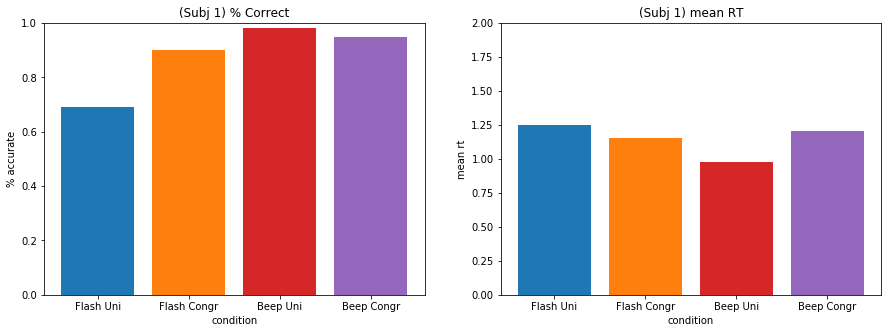

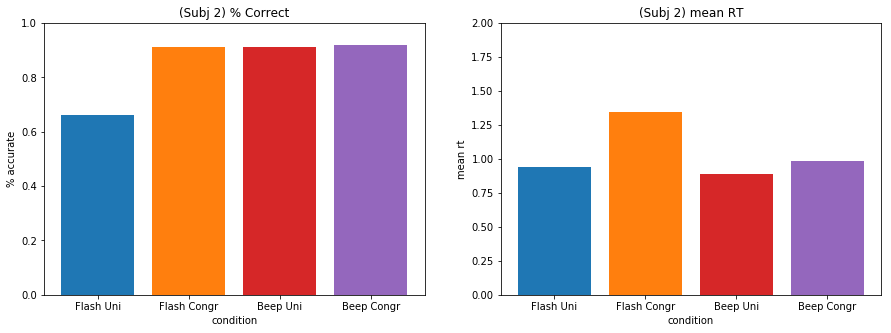

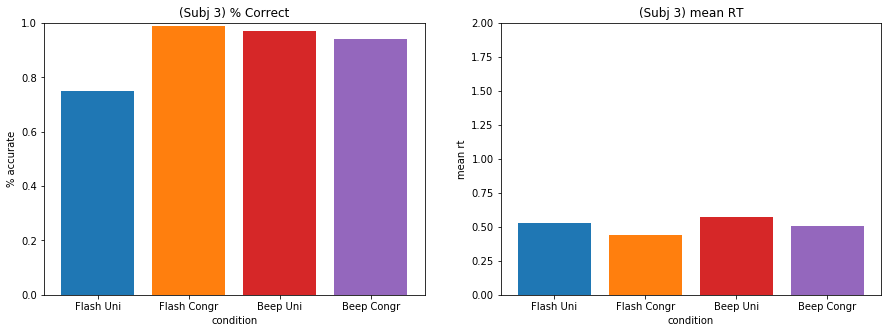

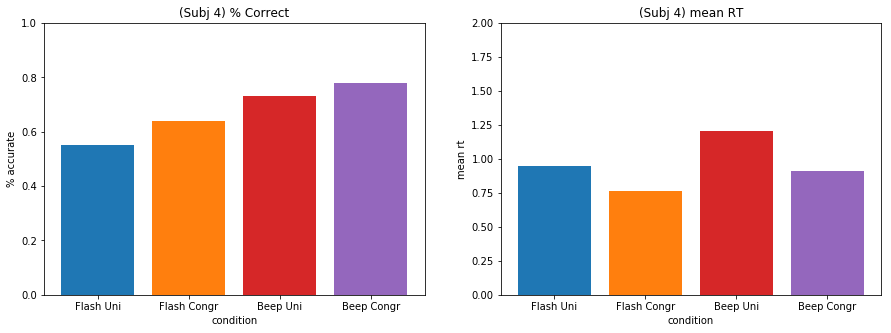

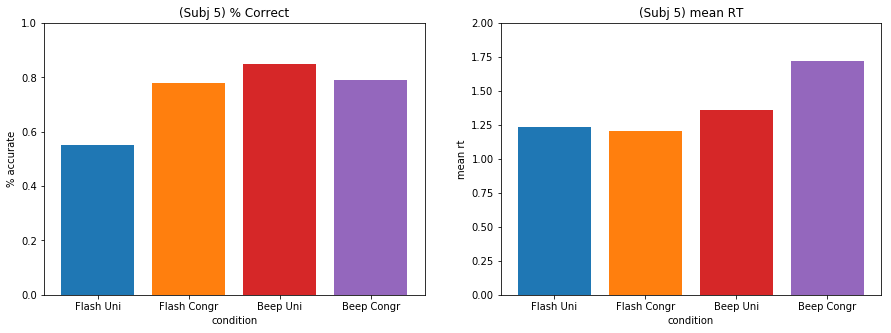

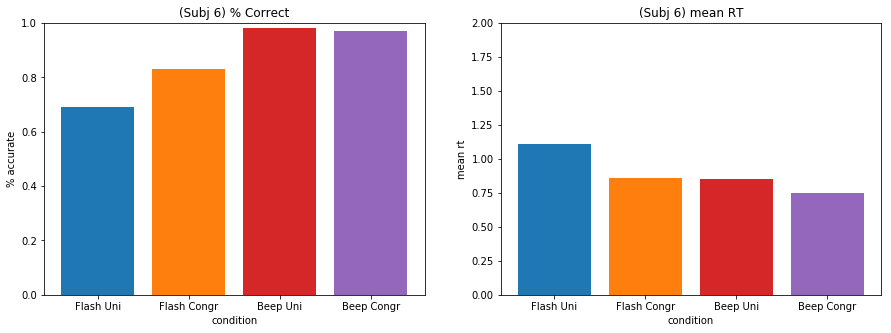

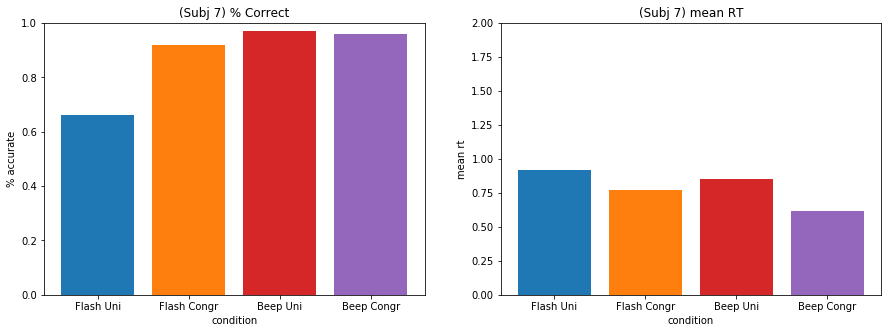

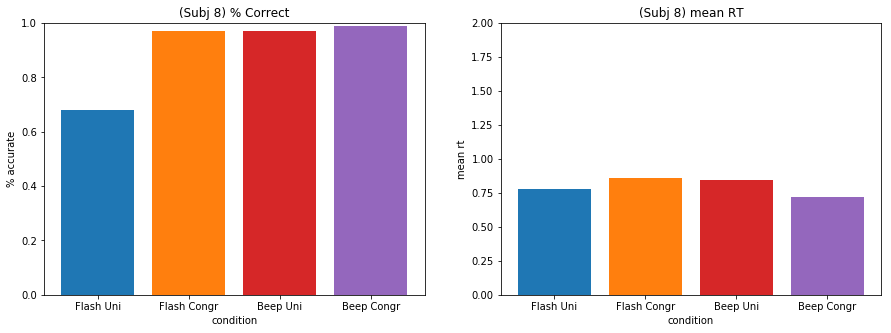

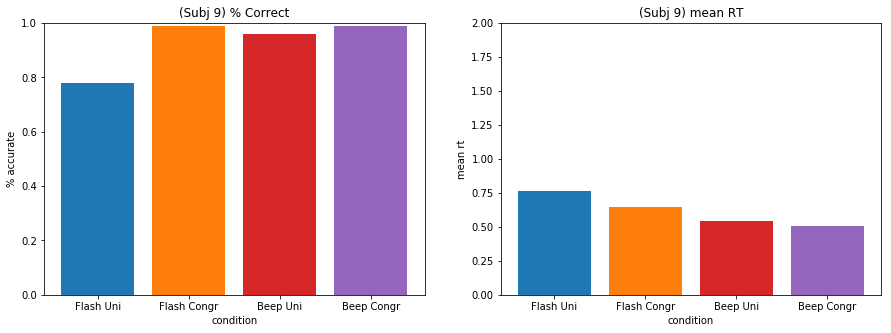

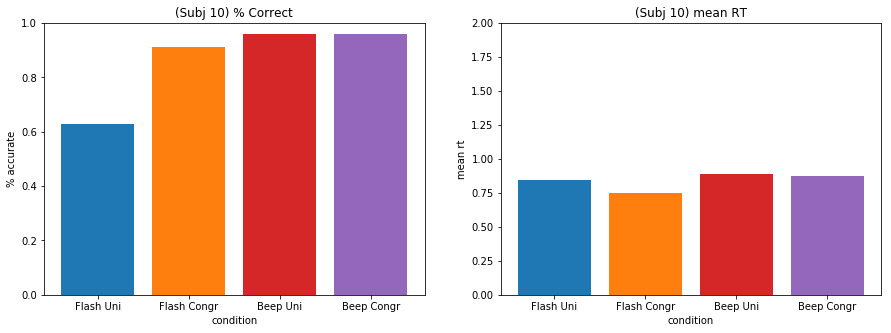

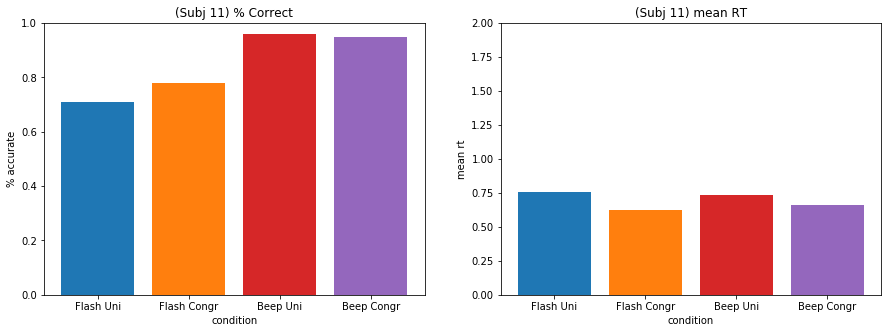

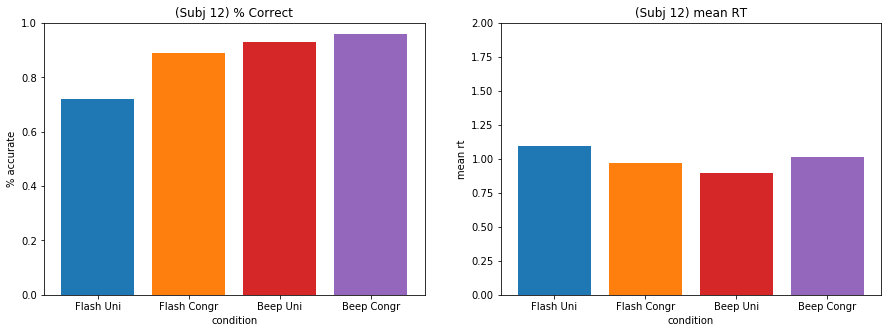

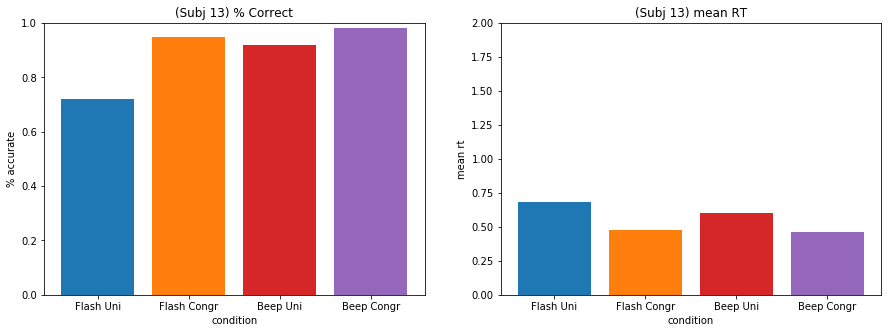

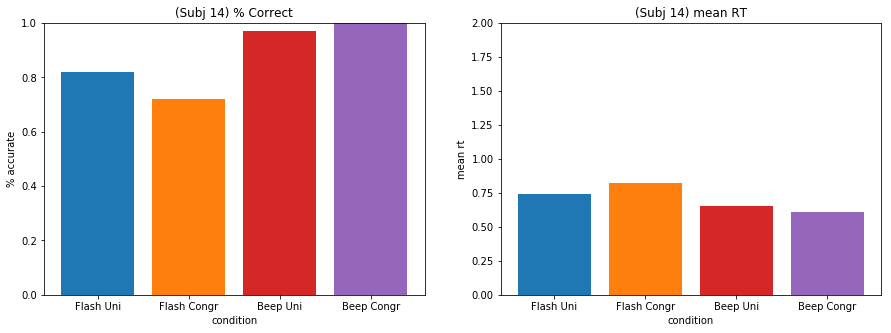

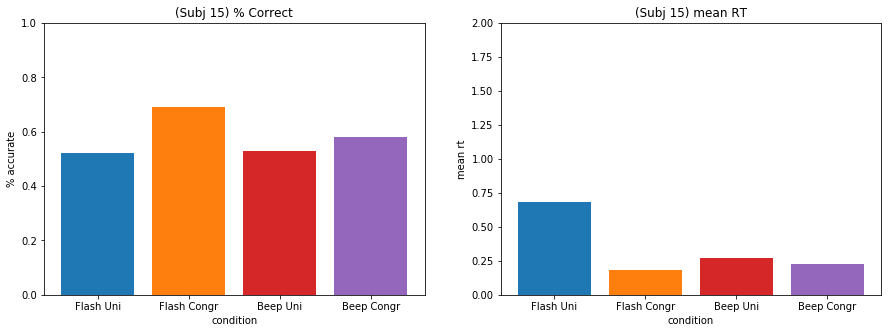

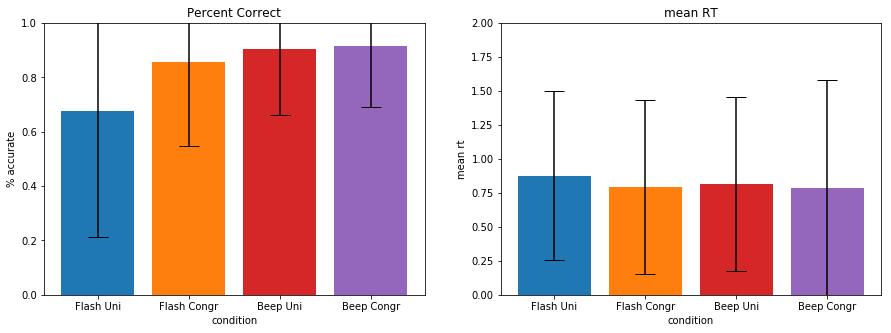

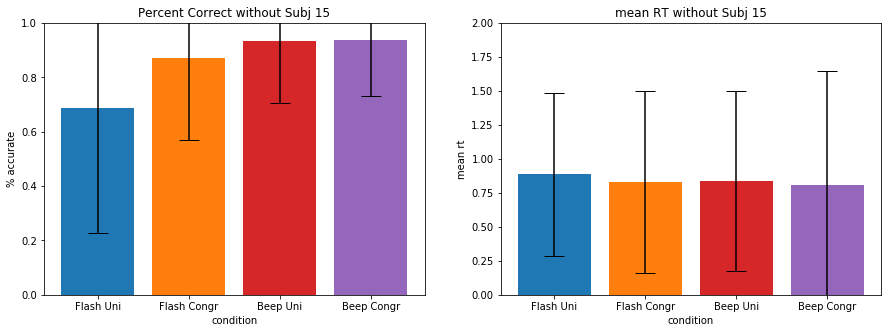

In [106]:
for i in np.arange(max(unif['subj_idx'])):
    plotbars(unif, unib, congrf, congrb, "(Subj " + str(int(i + 1)) + ") % Correct", 
             "(Subj " + str(int(i + 1)) + ") mean RT", int(i + 1))

plotbars(unif, unib, congrf, congrb, "Percent Correct", "mean RT")
plotbars(unif.loc[unif['subj_idx'] != 15], unib.loc[unib['subj_idx'] != 15], 
         congrf.loc[congrf['subj_idx'] != 15], congrb.loc[congrb['subj_idx'] != 15],
        "Percent Correct without Subj 15", "mean RT without Subj 15")

In [7]:
subject = 15

flashframe = droprow(flashframe, 0.05)
flashframe = dropsubj(flashframe, subject)
flashframe = droprow(flashframe, 10, False)
beepframe = droprow(beepframe, 0.05)
beepframe = dropsubj(beepframe, subject)
beepframe = droprow(beepframe, 10, False)

congrf = flashframe.loc[flashframe['flashpres'] == flashframe['beeppres']]
unif = flashframe.loc[flashframe['beeppres'] == 0]
congrb = beepframe.loc[beepframe['flashpres'] == beepframe['beeppres']]
unib = beepframe.loc[beepframe['flashpres'] == 0]

# Pairwise t-tests

Conduct t-test between accuracy or rt across all subjects (1400 pairs in each test, 100 from each subject)

## Comparing accuracy for flash trials (unisensory vs. bisensory)

In [119]:
print("pvalue: " + str(stats.ttest_rel(unif["acc"][1:], congrf["acc"])[1]))

pvalue: 7.545208303580591e-33


## Comparing accuracy for beep trials (unisensory vs. bisensory)

In [125]:
print("pvalue: " + str(stats.ttest_rel(unib["acc"][3:], congrb["acc"])[1]))

pvalue: 0.4641157028835692


## Comparing rt for flash trials (unisensory vs. bisensory)

In [128]:
print("pvalue: " + str(stats.ttest_rel(unif["rt"][1:], congrf["rt"])[1]))

pvalue: 0.9112509628115936


## Comparing rt for beep trials (unisensory vs. bisensory)

In [129]:
print("pvalue: " + str(stats.ttest_rel(unib["rt"][3:], congrb["rt"])[1]))

pvalue: 0.08822721470776992


# HDDM

In [9]:
alldata = pd.concat([flashframe, beepframe])
alldata.columns = ['subj_idx', 'flashpres', 'beeppres', 'response', 'rt']
conditions = [(alldata['flashpres'] == 0) & (alldata['beeppres'] == 2), 
              (alldata['flashpres'] == 0) & (alldata['beeppres'] == 3),
              (alldata['flashpres'] == 2) & (alldata['beeppres'] == 0),
              (alldata['flashpres'] == 3) & (alldata['beeppres'] == 0),
              (alldata['flashpres'] == 2) & (alldata['beeppres'] == 2),
              (alldata['flashpres'] == 3) & (alldata['beeppres'] == 3),]
choices = ['A2', 'A3', 'V2', 'V3', 'A2V2', 'A3V3']
alldata['stimName'] = np.select(conditions, choices)

In [10]:
model_unif = formatmodeldata(unif, [(unif['flashpres'] == 2), (unif['flashpres'] == 3)], ['F2', 'F3'])
model_unib = formatmodeldata(unib, [(unib['beeppres'] == 2), (unib['beeppres'] == 3)], ['B2', 'B3'])
model_congrf = formatmodeldata(congrf, [(congrf['flashpres'] == 2) & (congrf['beeppres'] == 2),
                                        (congrf['flashpres'] == 3) & (congrf['beeppres'] == 3)], ['F2B2', 'F3B3'])
model_congrb = formatmodeldata(congrb, [(congrb['flashpres'] == 2) & (congrb['beeppres'] == 2),
                                        (congrb['flashpres'] == 3) & (congrb['beeppres'] == 3)], ['F2B2', 'F3B3'])

In [11]:
model_unif['type'] = 'u'
model_congrf['type'] = 'c'
model_f = pd.concat([model_unif, model_congrf], axis = 0)
model_unib['type'] = 'u'
model_congrb['type'] = 'c'
model_b = pd.concat([model_unib, model_congrb], axis = 0)

## Flash models(same threshold)

In [88]:
flash_acc = hddm.HDDM(model_f, include=['a', 'v', 't', 'p_outlier'], depends_on={'v': ['type'], 't': ['type']})
flash_acc.sample(7000, burn=500)

 [-----------------100%-----------------] 7001 of 7000 complete in 505.8 sec

In [114]:
flash_acc.print_stats()
#unif_acc.plot_posteriors()

                    mean       std      2.5q       25q       50q       75q     97.5q    mc err
a               1.614595  0.074094  1.474758  1.565931  1.611738  1.659929  1.771103  0.001033
a_std           0.256029  0.064484  0.163871  0.210663  0.245660  0.287804  0.407137  0.001355
a_subj.1.0      1.946040  0.084180  1.790146  1.888473  1.942274  2.000663  2.121156  0.001770
a_subj.2.0      1.880668  0.079346  1.729387  1.825976  1.880209  1.933593  2.036986  0.001779
a_subj.3.0      1.350354  0.061667  1.237401  1.308375  1.347821  1.391412  1.478491  0.001326
a_subj.4.0      1.525775  0.067656  1.398282  1.478668  1.524604  1.570587  1.663653  0.001701
a_subj.5.0      1.751569  0.083002  1.599061  1.693916  1.747968  1.806379  1.919962  0.001859
a_subj.6.0      1.744490  0.070986  1.609936  1.695039  1.743977  1.790695  1.890331  0.001457
a_subj.7.0      1.789232  0.080080  1.645136  1.732303  1.786268  1.841212  1.956241  0.001905
a_subj.8.0      1.599707  0.074331  1.462873  1.54

In [14]:
flash_stim = hddm.HDDMStimCoding(stim_f, include='z', depends_on={'v': ['type'], 't': ['type'], 'z': ['type']}, stim_col='stimCode')
flash_stim.sample(7000, burn=500)

Setting model to be non-informative
Adding z to includes.
 [-----------------100%-----------------] 7000 of 7000 complete in 871.1 sec

In [15]:
flash_stim.print_stats()

                    mean       std      2.5q       25q       50q       75q     97.5q    mc err
a               1.792388  0.079117  1.635068  1.742416  1.792127  1.842186  1.951952  0.001245
a_std           0.275113  0.067964  0.175414  0.227389  0.264268  0.310335  0.440903  0.001270
a_subj.1.0      2.064684  0.073921  1.926601  2.014176  2.062108  2.113099  2.213824  0.001382
a_subj.2.0      2.065885  0.071065  1.929568  2.018042  2.064014  2.111984  2.210395  0.001211
a_subj.3.0      1.409283  0.066162  1.282941  1.364134  1.407558  1.452565  1.542894  0.001371
a_subj.4.0      1.751272  0.056040  1.643824  1.712123  1.750377  1.789280  1.861487  0.000924
a_subj.5.0      2.080402  0.072054  1.945824  2.030338  2.078831  2.128433  2.225543  0.001392
a_subj.6.0      1.891491  0.066036  1.766741  1.846077  1.889490  1.934690  2.025879  0.001150
a_subj.7.0      1.897217  0.067535  1.770950  1.850644  1.896504  1.942468  2.031533  0.001211
a_subj.8.0      1.770620  0.068051  1.644839  1.72

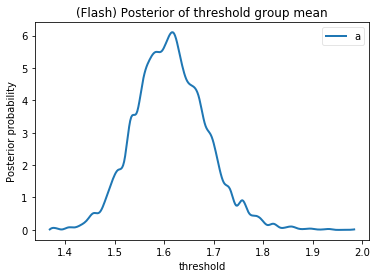

In [72]:
a = flash_acc.nodes_db.node['a']
hddm.analyze.plot_posterior_nodes([a])
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('(Flash) Posterior of threshold group mean')
plt.show()

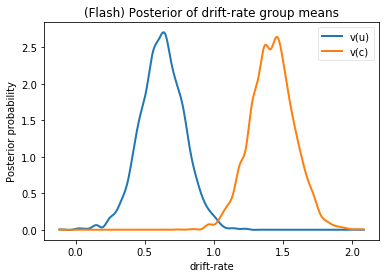

In [73]:
v_u, v_c = flash_acc.nodes_db.node[['v(u)', 'v(c)']]
hddm.analyze.plot_posterior_nodes([v_u, v_c])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('(Flash) Posterior of drift-rate group means')
plt.show()

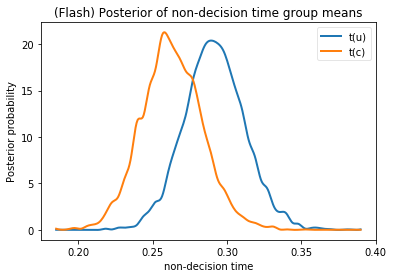

In [74]:
t_u, t_c = flash_acc.nodes_db.node[['t(u)', 't(c)']]
hddm.analyze.plot_posterior_nodes([t_u, t_c])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('(Flash) Posterior of non-decision time group means')
plt.show()

## Posterior Predictive Check (Flash)

In [93]:
fppc = hddm.utils.post_pred_gen(flash_acc)

 [-------------------110%-------------------] 31 of 28 complete in 1290.7 sec

In [98]:
fppc_compare = hddm.utils.post_pred_stats(model_f, fppc)
print(fppc_compare)

          observed      mean       std       SEM       MSE credible  \
stat                                                                  
accuracy  0.778135  0.795677  0.124663  0.000308  0.015849     True   
mean_ub   0.855433  0.820834  0.211357  0.001197  0.045869     True   
std_ub    0.665953  0.420534  0.161049  0.060231  0.086168     True   
10q_ub    0.389500  0.435356  0.093755  0.002103  0.010893     True   
30q_ub    0.537021  0.554826  0.126206  0.000317  0.016245     True   
50q_ub    0.665879  0.697958  0.171988  0.001029  0.030609     True   
70q_ub    0.849032  0.911364  0.245902  0.003885  0.064353     True   
90q_ub    1.449996  1.359270  0.413300  0.008231  0.179048     True   
mean_lb  -1.085988 -0.823607  0.234260  0.068844  0.123721     True   
std_lb    0.903215  0.388901  0.200062  0.264519  0.304544    False   
10q_lb    0.444976  0.465511  0.110517  0.000422  0.012636     True   
30q_lb    0.630831  0.577676  0.144925  0.002825  0.023829     True   
50q_lb

## Parameter Recovery (Flash)

In [85]:
fsyndata, fparam = hddm.generate.gen_rand_data(params={'u': {'a': 1.614636, 'v': 0.632827, 't': 0.291453},
                                                       'c': {'a': 1.614636, 'v': 1.411774, 't': 0.263463}}, 
                                               size = 100, subjs = 14)

In [87]:
fparamrec = hddm.HDDM(fsyndata, include=['a', 'v', 't', 'p_outlier'], depends_on={'v': 'condition', 't': 'condition'})
fparamrec.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 579.6 sec

In [108]:
#fparamrec.print_stats()

## Beep models(same threshold)

In [31]:
beep_acc = hddm.HDDM(model_b, include=['a', 'v', 't', 'p_outlier'], depends_on={'v': ['type'], 't': ['type']})
beep_acc.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 503.0 sec

In [32]:
beep_acc.print_stats()
#unif_acc.plot_posteriors()

                    mean       std      2.5q       25q       50q       75q     97.5q    mc err
a               2.323184  0.132787  2.079382  2.232871  2.317862  2.403116  2.602197  0.006272
a_std           0.370388  0.117035  0.194781  0.287889  0.352544  0.432653  0.643402  0.005377
a_subj.1.0      2.794447  0.212862  2.399844  2.645900  2.789707  2.934089  3.227106  0.008683
a_subj.2.0      2.049990  0.111148  1.847145  1.973389  2.043089  2.122399  2.286882  0.002733
a_subj.3.0      2.121067  0.238701  1.706255  1.944658  2.106829  2.276155  2.623671  0.014205
a_subj.4.0      1.932876  0.081378  1.780331  1.876367  1.931295  1.986918  2.097528  0.001726
a_subj.5.0      2.328446  0.093726  2.152608  2.263943  2.327581  2.391479  2.513327  0.001568
a_subj.6.0      2.740784  0.273780  2.274125  2.547128  2.716819  2.911125  3.339509  0.014373
a_subj.7.0      2.454521  0.181265  2.130400  2.327356  2.441464  2.569103  2.839617  0.007427
a_subj.8.0      2.566339  0.239615  2.149757  2.39

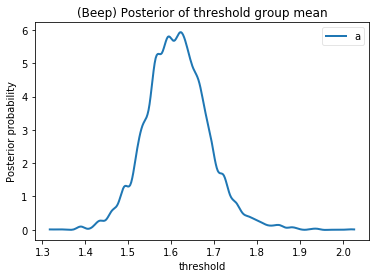

In [75]:
a = beep_acc.nodes_db.node['a']
hddm.analyze.plot_posterior_nodes([a])
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('(Beep) Posterior of threshold group mean')
plt.show()

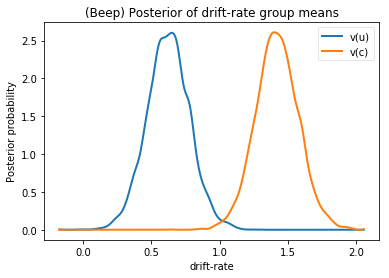

In [76]:
v_u, v_c = beep_acc.nodes_db.node[['v(u)', 'v(c)']]
hddm.analyze.plot_posterior_nodes([v_u, v_c])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('(Beep) Posterior of drift-rate group means')
plt.show()

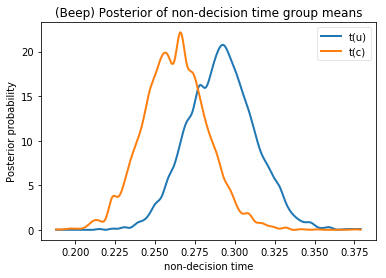

In [77]:
t_u, t_c = beep_acc.nodes_db.node[['t(u)', 't(c)']]
hddm.analyze.plot_posterior_nodes([t_u, t_c])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('(Beep) Posterior of non-decision time group means')
plt.show()

## Posterior Predictive Check (Beep)

In [94]:
bppc = hddm.utils.post_pred_gen(beep_acc)

 [-------------------110%-------------------] 31 of 28 complete in 1335.7 sec

In [97]:
bppc_compare = hddm.utils.post_pred_stats(model_b, bppc)
print(bppc_compare)

          observed      mean       std       SEM       MSE credible  \
stat                                                                  
accuracy  0.778135  0.795291  0.123737  0.000294  0.015605     True   
mean_ub   0.855433  0.821188  0.212542  0.001173  0.046347     True   
std_ub    0.665953  0.420464  0.162188  0.060265  0.086570     True   
10q_ub    0.389500  0.435782  0.094601  0.002142  0.011091     True   
30q_ub    0.537021  0.555186  0.127195  0.000330  0.016509     True   
50q_ub    0.665879  0.698644  0.172780  0.001074  0.030926     True   
70q_ub    0.849032  0.912208  0.248106  0.003991  0.065548     True   
90q_ub    1.449996  1.359244  0.414484  0.008236  0.180033     True   
mean_lb  -1.085988 -0.822176  0.232183  0.069597  0.123506     True   
std_lb    0.903215  0.389508  0.200447  0.263896  0.304074    False   
10q_lb    0.444976  0.465194  0.112444  0.000409  0.013052     True   
30q_lb    0.630831  0.576500  0.145448  0.002952  0.024107     True   
50q_lb

## Parameter Recovery (Beep)

In [90]:
bsyndata, bparam = hddm.generate.gen_rand_data(params={'u': {'a': 1.615013, 'v': 0.629093, 't': 0.291373},
                                                       'c': {'a': 1.615013, 'v': 1.411574, 't': 0.263052}}, 
                                               size = 100, subjs = 14)

In [91]:
bparamrec = hddm.HDDM(bsyndata, include=['a', 'v', 't', 'p_outlier'], depends_on={'v': 'condition', 't': 'condition'})
bparamrec.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 605.4 sec

In [107]:
#bparamrec.print_stats()

## Vary by unisensory/congruent and 2/3 flashes

In [79]:
flash_acc2 = hddm.HDDM(model_f, include=['a', 'v', 't', 'p_outlier'], depends_on={'v': ['type', 'stimName'], 't': ['type', 'stimName']})
flash_acc2.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 637.8 sec

In [80]:
flash_acc2.print_stats()

                         mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                    1.703131  0.094190  1.530280  1.639464  1.697672  1.761284  1.901385  0.001469
a_std                0.332672  0.083625  0.210828  0.274489  0.318305  0.375153  0.528948  0.001774
a_subj.1.0           2.126073  0.111639  1.921076  2.047733  2.119805  2.197454  2.366489  0.002548
a_subj.2.0           1.929853  0.083002  1.773527  1.872145  1.926948  1.984221  2.102571  0.001499
a_subj.3.0           1.370059  0.080798  1.217519  1.313481  1.367761  1.423700  1.535422  0.002702
a_subj.4.0           1.762512  0.076686  1.618694  1.710062  1.759930  1.812207  1.921942  0.001561
a_subj.5.0           2.014737  0.100214  1.826708  1.946206  2.011284  2.079095  2.220786  0.002287
a_subj.6.0           1.897676  0.090718  1.726116  1.833759  1.895433  1.957566  2.081776  0.002217
a_subj.7.0           1.797476  0.076027  1.651538  1.745684  1.796250  1.846571  1.949046  0.001456


In [90]:
fppc2 = hddm.utils.post_pred_gen(flash_acc2)

 [------------------105%------------------] 59 of 56 complete in 2396.0 sec

In [93]:
fppc_compare2 = hddm.utils.post_pred_stats(model_f, fppc2)
print(fppc_compare2)

          observed      mean       std           SEM       MSE credible  \
stat                                                                      
accuracy  0.778135  0.785527  0.226781  5.464787e-05  0.051484     True   
mean_ub   0.855433  0.824403  0.255163  9.629046e-04  0.066071     True   
std_ub    0.665953  0.400850  0.206955  7.027969e-02  0.113110     True   
10q_ub    0.389500  0.454602  0.121276  4.238339e-03  0.018946     True   
30q_ub    0.537021  0.571205  0.157151  1.168506e-03  0.025865     True   
50q_ub    0.665879  0.709956  0.212699  1.942770e-03  0.047184     True   
70q_ub    0.849032  0.913406  0.304318  4.144056e-03  0.096754     True   
90q_ub    1.449996  1.326561  0.502026  1.523606e-02  0.267267     True   
mean_lb  -1.085988 -0.842109  0.300749  5.947689e-02  0.149927     True   
std_lb    0.903215  0.342147  0.269634  3.147972e-01  0.387500     True   
10q_lb    0.444976  0.530092  0.199483  7.244650e-03  0.047038     True   
30q_lb    0.630831  0.630

In [25]:
beep_acc2 = hddm.HDDM(model_b, include=['a', 'v', 't', 'p_outlier'], depends_on={'v': ['type', 'stimName'], 't': ['type', 'stimName']})
beep_acc2.sample(7000, burn=500)

 [-----------------100%-----------------] 7001 of 7000 complete in 683.9 sec

In [26]:
beep_acc2.print_stats()

                         mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                    2.200595  0.112022  1.995613  2.124570  2.194940  2.269042  2.445599  0.004953
a_std                0.319009  0.093885  0.173661  0.254210  0.305648  0.369765  0.544017  0.003129
a_subj.1.0           2.768557  0.188990  2.422729  2.636831  2.759288  2.891783  3.157849  0.007411
a_subj.2.0           2.054795  0.105359  1.864433  1.980444  2.051144  2.123073  2.274486  0.003036
a_subj.3.0           1.912661  0.176501  1.618852  1.787960  1.893891  2.017807  2.307200  0.008070
a_subj.4.0           2.050665  0.085349  1.888219  1.992570  2.048839  2.105857  2.227876  0.002016
a_subj.5.0           2.351929  0.096149  2.170049  2.285556  2.349899  2.415424  2.549821  0.002015
a_subj.6.0           2.492803  0.221884  2.088632  2.338092  2.478854  2.635888  2.949100  0.011300
a_subj.7.0           2.344883  0.151087  2.073811  2.240539  2.336642  2.440902  2.666535  0.005262


In [27]:
bppc2 = hddm.utils.post_pred_gen(beep_acc2)

 [------------------105%------------------] 59 of 56 complete in 2853.8 sec

In [29]:
bppc_compare2 = hddm.utils.post_pred_stats(model_b, bppc2)
print(bppc_compare2)

          observed      mean       std       SEM       MSE credible  \
stat                                                                  
accuracy  0.936003  0.958033  0.098906  0.000485  0.010268     True   
mean_ub   0.811824  0.747368  0.257363  0.004155  0.070390     True   
std_ub    0.705276  0.354193  0.215075  0.123259  0.169517     True   
10q_ub    0.364230  0.409418  0.100310  0.002042  0.012104     True   
30q_ub    0.491178  0.525384  0.142563  0.001170  0.021494     True   
50q_ub    0.613278  0.653432  0.203826  0.001612  0.043157     True   
70q_ub    0.787827  0.833393  0.303793  0.002076  0.094366     True   
90q_ub    1.393924  1.197600  0.526981  0.038543  0.316252     True   
mean_lb  -1.516434 -0.882663  0.422287  0.401666  0.579992     True   
std_lb    1.449590  0.273431  0.354659  1.383349  1.509132    False   
10q_lb    0.498767  0.637923  0.314918  0.019364  0.118538     True   
30q_lb    0.745144  0.722800  0.329991  0.000499  0.109393     True   
50q_lb

## Vary by unisensory/congruent and 2/3 flashes, add back bound sep

In [14]:
flash_acc3 = hddm.HDDM(model_f, include=['a', 'v', 't', 'p_outlier'], depends_on={'a': ['type', 'stimName'], 'v': ['type', 'stimName'], 't': ['type', 'stimName']})
flash_acc3.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 724.6 sec

In [15]:
flash_acc3.print_stats()

                         mean       std      2.5q       25q       50q       75q     97.5q    mc err
a(F2.u)              1.811840  0.111500  1.592404  1.738819  1.811359  1.884319  2.036660  0.002694
a(F2B2.c)            2.047023  0.133524  1.795251  1.955991  2.044066  2.136802  2.317286  0.004606
a(F3.u)              1.571487  0.098330  1.381276  1.505106  1.571307  1.635536  1.766772  0.001651
a(F3B3.c)            1.817476  0.114147  1.595926  1.740297  1.817382  1.891872  2.049284  0.002872
a_std                0.363458  0.053674  0.271009  0.325430  0.359145  0.396405  0.481025  0.001880
a_subj(F2.u).1.0     2.125704  0.269858  1.697706  1.939081  2.091427  2.273391  2.754127  0.008309
a_subj(F2.u).2.0     1.588058  0.140934  1.330326  1.488942  1.580923  1.679989  1.885886  0.003216
a_subj(F2.u).3.0     1.993313  0.296428  1.482574  1.783737  1.966249  2.174361  2.642914  0.011429
a_subj(F2.u).4.0     1.899771  0.202962  1.543799  1.757544  1.885581  2.026179  2.341874  0.005158


## Stim Coded

In [12]:
# 0 means responded 2, 1 means responded 3
def stimcode(df, conditions, choices):
    dframe = df.copy()
    dframe['stimCode'] = np.select(conditions, choices)
    return(dframe)

stim_unif = stimcode(model_unif, [(model_unif['flashpres'] == 2) & (model_unif['response'] == 0), 
                                  (model_unif['flashpres'] == 2) & (model_unif['response'] == 1),
                                  (model_unif['flashpres'] == 3) & (model_unif['response'] == 0),
                                  (model_unif['flashpres'] == 3) & (model_unif['response'] == 1)], [1, 0, 0, 1])
stim_congrf = stimcode(model_congrf, [(model_congrf['flashpres'] == 2) & (model_congrf['response'] == 0), 
                                      (model_congrf['flashpres'] == 2) & (model_congrf['response'] == 1),
                                      (model_congrf['flashpres'] == 3) & (model_congrf['response'] == 0),
                                      (model_congrf['flashpres'] == 3) & (model_congrf['response'] == 1)], [1, 0, 0, 1])
stim_unib = stimcode(model_unib, [(model_unib['beeppres'] == 2) & (model_unib['response'] == 0), 
                                  (model_unib['beeppres'] == 2) & (model_unib['response'] == 1),
                                  (model_unib['beeppres'] == 3) & (model_unib['response'] == 0),
                                  (model_unib['beeppres'] == 3) & (model_unib['response'] == 1)], [1, 0, 0, 1])
stim_congrb = stimcode(model_congrb, [(model_congrb['beeppres'] == 2) & (model_congrb['response'] == 0), 
                                      (model_congrb['beeppres'] == 2) & (model_congrb['response'] == 1),
                                      (model_congrb['beeppres'] == 3) & (model_congrb['response'] == 0),
                                      (model_congrb['beeppres'] == 3) & (model_congrb['response'] == 1)], [1, 0, 0, 1])

In [13]:
stim_f = pd.concat([stim_unif, stim_congrf], axis = 0)
stim_f.head(10)

,subj_idx,flashpres,beeppres,response,rt,stimName,type,stimCode
2,1.0,3.0,0.0,1.0,1.341606,F3,u,1
5,1.0,3.0,0.0,1.0,1.967426,F3,u,1
7,1.0,3.0,0.0,1.0,0.869609,F3,u,1
10,1.0,3.0,0.0,1.0,1.167405,F3,u,1
12,1.0,3.0,0.0,1.0,1.050508,F3,u,1
14,1.0,3.0,0.0,1.0,0.787502,F3,u,1
17,1.0,2.0,0.0,1.0,0.922216,F2,u,0
19,1.0,3.0,0.0,1.0,0.789067,F3,u,1
20,1.0,2.0,0.0,1.0,0.907375,F2,u,0
26,1.0,3.0,0.0,1.0,1.070062,F3,u,1


In [105]:
flash_stim = hddm.HDDMStimCoding(stim_f, include='z', depends_on={'v': ['type', 'stimName'], 't': ['type', 'stimName'], 'z': 'type'}, stim_col='stimCode')
flash_stim.sample(7000, burn=500)

Setting model to be non-informative
Adding z to includes.
 [-----------------100%-----------------] 7000 of 7000 complete in 1772.4 sec

In [106]:
flash_stim.print_stats()

                         mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                    1.904048  0.099227  1.708529  1.840059  1.903409  1.965683  2.106576  0.001409
a_std                0.345528  0.082940  0.223669  0.286254  0.331946  0.391200  0.537797  0.001494
a_subj.1.0           2.253154  0.102031  2.059452  2.183047  2.249792  2.320062  2.464200  0.002446
a_subj.2.0           2.133702  0.082254  1.979030  2.077864  2.131546  2.186996  2.303576  0.001737
a_subj.3.0           1.551199  0.099257  1.370126  1.480425  1.548348  1.614595  1.756716  0.003501
a_subj.4.0           1.932185  0.079670  1.784489  1.877316  1.929952  1.983062  2.097370  0.001590
a_subj.5.0           2.323646  0.092517  2.152075  2.259935  2.319799  2.384752  2.513138  0.002161
a_subj.6.0           2.179983  0.108895  1.975531  2.105668  2.175114  2.250421  2.406734  0.002935
a_subj.7.0           1.983323  0.078482  1.835785  1.928028  1.981165  2.036664  2.144011  0.001442


In [111]:
fppc3 = hddm.utils.post_pred_gen(flash_stim)

 [-----------------102%------------------] 109 of 106 complete in 4649.1 sec

In [112]:
fppc_compare3 = hddm.utils.post_pred_stats(stim_f, fppc3)
print(fppc_compare3)

          observed      mean       std       SEM       MSE credible  \
stat                                                                  
accuracy  0.778135  0.759051  0.242311  0.000364  0.059079     True   
mean_ub   0.855433  0.953571  0.398322  0.009631  0.168292     True   
std_ub    0.665953  0.466251  0.304951  0.039881  0.132876     True   
10q_ub    0.389500  0.527036  0.243709  0.018916  0.078310     True   
30q_ub    0.537021  0.664534  0.289967  0.016260  0.100340     True   
50q_ub    0.665879  0.827934  0.361281  0.026262  0.156786     True   
70q_ub    0.849032  1.064322  0.475462  0.046350  0.272414     True   
90q_ub    1.449996  1.509043  0.725378  0.003487  0.529660     True   
mean_lb  -1.085988 -0.973375  0.456073  0.012682  0.220684     True   
std_lb    0.903215  0.434834  0.349589  0.219381  0.341593     True   
10q_lb    0.444976  0.582024  0.315106  0.018782  0.118074     True   
30q_lb    0.630831  0.707376  0.355717  0.005859  0.132394     True   
50q_lb